# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## 1. Exploration and data cleaning (6 points)

**1.1. Read the dataset `movies.csv` and visualise it**

In [4]:
import pandas as pd

# Load the dataset
movies = pd.read_csv('movies.csv')

In [5]:
print(movies)

                                   MOVIES         YEAR  \
0                           Blood Red Sky       (2021)   
1     Masters of the Universe: Revelation     (2021– )   
2                        The Walking Dead  (2010–2022)   
3                          Rick and Morty     (2013– )   
4                         Army of Thieves       (2021)   
...                                   ...          ...   
9994                       The Imperfects     (2021– )   
9995                               Arcane     (2021– )   
9996                    Heart of Invictus     (2022– )   
9997                       The Imperfects     (2021– )   
9998                       The Imperfects     (2021– )   

                                           GENRE  RATING  \
0         \nAction, Horror, Thriller                 6.1   
1     \nAnimation, Action, Adventure                 5.0   
2          \nDrama, Horror, Thriller                 8.2   
3     \nAnimation, Adventure, Comedy                 9.2   
4  

**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [7]:
# Display the size of the DataFrame
size = movies.shape  # (number of rows, number of columns)
print(size)

(9999, 9)


In [8]:
# Count the number of missing data points per column
missing_data = movies.isnull().sum()
print(missing_data)

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64


**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [10]:
# Fill missing values without using inplace
movies['YEAR'] = movies['YEAR'].fillna('Unknown')
movies['GENRE'] = movies['GENRE'].fillna('Unknown')
movies['RATING'] = movies['RATING'].fillna(movies['RATING'].median())
movies['VOTES'] = movies['VOTES'].fillna(0)

In [11]:
print(movies.head())

                                MOVIES         YEAR  \
0                        Blood Red Sky       (2021)   
1  Masters of the Universe: Revelation     (2021– )   
2                     The Walking Dead  (2010–2022)   
3                       Rick and Morty     (2013– )   
4                      Army of Thieves       (2021)   

                                        GENRE  RATING  \
0      \nAction, Horror, Thriller                 6.1   
1  \nAnimation, Action, Adventure                 5.0   
2       \nDrama, Horror, Thriller                 8.2   
3  \nAnimation, Adventure, Comedy                 9.2   
4         \nAction, Crime, Horror                 7.1   

                                            ONE-LINE  \
0  \nA woman with a mysterious illness is forced ...   
1  \nThe war for Eternia begins again in what may...   
2  \nSheriff Deputy Rick Grimes wakes up from a c...   
3  \nAn animated series that follows the exploits...   
4  \nA prequel, set before the events of Army 

**1.4 Drop the duplicated rows**

In [12]:
# Drop duplicate rows from the DataFrame
movies = movies.drop_duplicates()
print(movies.head())

                                MOVIES         YEAR  \
0                        Blood Red Sky       (2021)   
1  Masters of the Universe: Revelation     (2021– )   
2                     The Walking Dead  (2010–2022)   
3                       Rick and Morty     (2013– )   
4                      Army of Thieves       (2021)   

                                        GENRE  RATING  \
0      \nAction, Horror, Thriller                 6.1   
1  \nAnimation, Action, Adventure                 5.0   
2       \nDrama, Horror, Thriller                 8.2   
3  \nAnimation, Adventure, Comedy                 9.2   
4         \nAction, Crime, Horror                 7.1   

                                            ONE-LINE  \
0  \nA woman with a mysterious illness is forced ...   
1  \nThe war for Eternia begins again in what may...   
2  \nSheriff Deputy Rick Grimes wakes up from a c...   
3  \nAn animated series that follows the exploits...   
4  \nA prequel, set before the events of Army 

**1.5 Replace the columns names to make them all lowercase**

In [13]:
# Convert all column names to lowercase
movies.columns = movies.columns.str.lower()

In [14]:
print(movies.columns)

Index(['movies', 'year', 'genre', 'rating', 'one-line', 'stars', 'votes',
       'runtime', 'gross'],
      dtype='object')


**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [15]:
# Remove commas and convert to float
movies['votes'] = movies['votes'].str.replace(',', '').astype(float)


In [16]:
print(movies[['votes']].head())

      votes
0   21062.0
1   17870.0
2  885805.0
3  414849.0
4       NaN


## 2. Descriptive statistics (5 points)

**2.1 What is the average rating?**

In [17]:
# Calculate the average rating
average_rating = movies['rating'].mean()
print(f"The average rating is: {average_rating}")

The average rating is: 6.94608068561873


**2.2 What is the maximum runtime?**

In [18]:
# Calculate the maximum runtime
max_runtime = movies['runtime'].max()
print(f"The maximum runtime is: {max_runtime} minutes")

The maximum runtime is: 853.0 minutes


**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [19]:
# Filter the dataset for the movie/series with the longest runtime
longest_runtime_movie = movies[movies['runtime'] == movies['runtime'].max()]
print(longest_runtime_movie)

                        movies         year  \
1902  El tiempo entre costuras  (2013–2014)   

                                        genre  rating  \
1902  \nAdventure, Drama, History                 8.3   

                                               one-line  \
1902  \nSira Quiroga is a young Spanish dressmaker e...   

                                                  stars   votes  runtime gross  
1902  \n            \n    Stars:\nAdriana Ugarte, \n...  3876.0    853.0   NaN  


**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

<Axes: title={'center': 'Movie Runtimes (0 to 200 minutes)'}, ylabel='Frequency'>

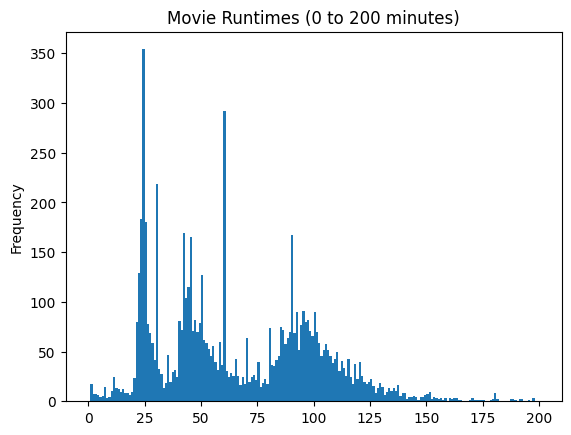

In [30]:
!pip install matplotlib

# Plot the histogram for runtimes
filtered_runtimes = movies[(movies['runtime'] > 0) & (movies['runtime'] < 200)]

filtered_runtimes['runtime'].plot(kind='hist', title="Movie Runtimes (0 to 200 minutes)", range=(0, 200), bins=200)

**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [27]:
# Calculate the 90th quantile
votes_90th_quantile = movies['votes'].quantile(0.90)

print(votes_90th_quantile)


22193.100000000035


## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [48]:
# Read the movies_metadata.csv file into a DataFrame
df_meta = pd.read_csv('movies_metadata.csv')
print(df_meta)

       adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 

/var/folders/kx/35380zqx7fvczy74kh7ych5h0000gn/T/ipykernel_90478/1799808190.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv('movies_metadata.csv')


In [54]:
# Perform an inner merge between df_meta and movies DataFrames
inner_df = df_meta.merge(movies, how="inner", left_on= "runtime", right_on="runtime")

In [56]:
print(inner_df)

         adult                              belongs_to_collection    budget  \
0        False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1        False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
2        False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
3        False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
4        False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
...        ...                                                ...       ...   
3283156  False                                                NaN         0   
3283157  False                                                NaN         0   
3283158  False                                                NaN         0   
3283159  False                                                NaN         0   
3283160  False                                                NaN         0   

                                                   